In [1]:
from PIL import Image
import requests
import matplotlib.pyplot as plt

# Skin Cancer Detection Project

In [2]:
img_A = Image.open(requests.get('https://avatars.githubusercontent.com/u/130187615?v=4', stream=True).raw)
img_B=Image.open(requests.get('https://res.cloudinary.com/wagon/image/upload/c_fill,g_face,h_200,w_200/v1682322545/jooigdwuvxezp0hwguh1.jpg', stream=True).raw)
img_C=Image.open(requests.get('https://avatars.githubusercontent.com/u/99614473?v=4', stream=True).raw)
img_D=Image.open(requests.get('https://res.cloudinary.com/wagon/image/upload/c_fill,g_face,h_200,w_200/v1682322613/rpdiddalk7eqoeobfawr.jpg', stream=True).raw)

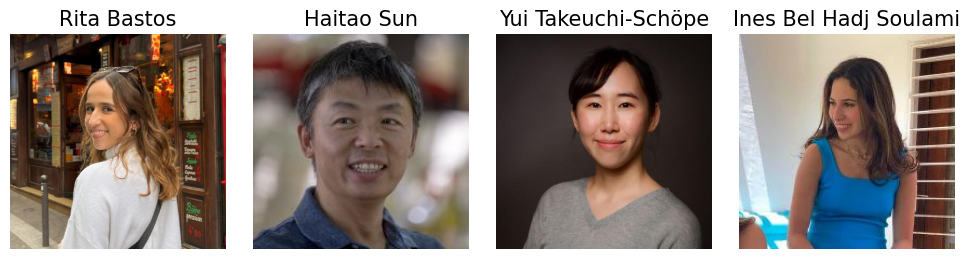

In [47]:
fig, ax = plt.subplots(1,4, figsize=(10,10))
for i in range(4):
    ax[i].set_axis_off()
fig.tight_layout(pad=2.0)


ax[0].imshow(img_A)
ax[0].set_title('Rita Bastos', fontsize=15)
ax[1].imshow(img_B)
ax[1].set_title('Haitao Sun', fontsize=15)
ax[2].imshow(img_C)
ax[2].set_title('Yui Takeuchi-Schöpe', fontsize=15)
ax[3].imshow(img_D)
ax[3].set_title('Ines Bel Hadj Soulami', fontsize=15)

for i in ax:
    i.set_xticks([])
    i.set_xticklabels([])
    i.set_yticks([])
    i.set_yticklabels([]);
    

# Data

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%reload_ext autoreload
%autoreload 2

# system libraries
import os
import sys
sys.path.append("..")

# package for image processing and display
from PIL import Image

# helper functions defined in the utils module
from utils import *

In [23]:
processed_data = pd.read_csv('../processed_data/ISIC_2019_Training_GroundTruth_Processed_Balanced.csv')

In [24]:
raw_data = pd.read_csv('../raw_data/ISIC_2019_Training_GroundTruth.csv')

In [25]:
def cancer(df):
    if 1 in (df['MEL'],df['BCC'],df['AK'],df['SCC']):
        return 'Malignant'
    return 'Benign'
def cancer_(df):
    if df['category']in ['MEL','BCC','AK','SCC']:
        return 'Malignant'
    return 'Benign'

def category(df):
    if df['MEL']==1:
        return 'MEL'
    elif df['NV']==1:
        return 'NV'
    elif df['BCC']==1:
        return 'BCC'
    elif df['AK']==1:
        return 'AK'
    elif df['BKL']==1:
        return 'BKL'
    elif df['DF']==1:
        return 'DF'
    elif df['VASC']==1:
        return 'VASC'
    elif df['SCC']==1:
        return 'SCC'
    return 'UNK'

In [32]:
raw_data['cancer'] = raw_data.apply(cancer, axis=1)
raw_data['category'] = raw_data.apply(category, axis=1)
processed_data['cancer'] = raw_data.apply(cancer, axis=1).drop(columns='image')
processed_data['category'] = processed_data.apply(category, axis=1)

In [33]:
raw_data_ = pd.DataFrame({'count':raw_data.category.value_counts().sort_values(ascending =False)}).reset_index()
processed_data_=pd.DataFrame({'count':processed_data.category.value_counts().sort_values(ascending =False)}).reset_index()

In [34]:
raw_data_['cancer']= raw_data_.apply(cancer_, axis=1)
processed_data_['cancer']= processed_data_.apply(cancer_, axis=1)

In [35]:
pie_raw_data = raw_data_.groupby(by='cancer').sum().reset_index()
pie_raw_data = pie_raw_data.drop(columns = 'category')
pie_processed_data = processed_data_.groupby(by='cancer').sum().reset_index()
pie_processed_data = pie_processed_data.drop(columns = 'category')

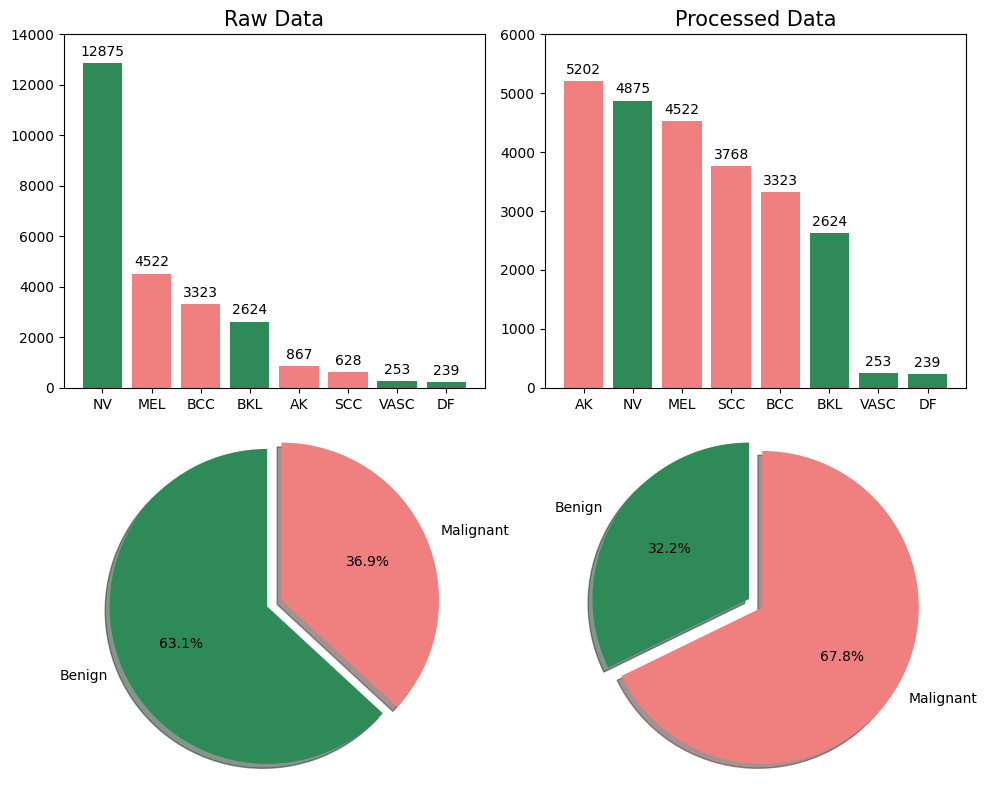

In [42]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2,figsize=(10, 8))

#AX1
c_ax1 = ('seagreen', 'lightcoral', 'lightcoral', 'seagreen', 'lightcoral','lightcoral','seagreen','seagreen')

pps =ax1.bar(raw_data_['category'], height=raw_data_['count'],
                 color=c_ax1);
for p in pps:
    height = p.get_height()
    ax1.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
ax1.set_ylim([0, 14000])
ax1.set_title('Raw Data', fontsize=15);

#AX2
c_ax2 = ('lightcoral', 'seagreen', 'lightcoral', 'lightcoral', 'lightcoral','seagreen','seagreen','seagreen')

pps_2 =ax2.bar(processed_data_['category'], height=processed_data_['count'],
                 color=c_ax2);
for p in pps_2:
    height = p.get_height()
    ax2.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')
    
ax2.set_ylim([0, 6000])
ax2.set_title('Processed Data', fontsize=15);


#AX3
labels = pie_raw_data['cancer']
sizes = pie_raw_data['count']
explode = (0, 0.1) 
c = ['seagreen', 'lightcoral']
ax3.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c)
ax3.axis('equal')  

#AX4
labels = pie_processed_data['cancer']
sizes = pie_processed_data['count']
explode = (0, 0.1) 
c = ['seagreen', 'lightcoral']
ax4.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors=c)
ax4.axis('equal')  

plt.tight_layout()
plt.show()

In [12]:
raw_data.drop(columns='image', inplace=True)

# Data Preprocessing

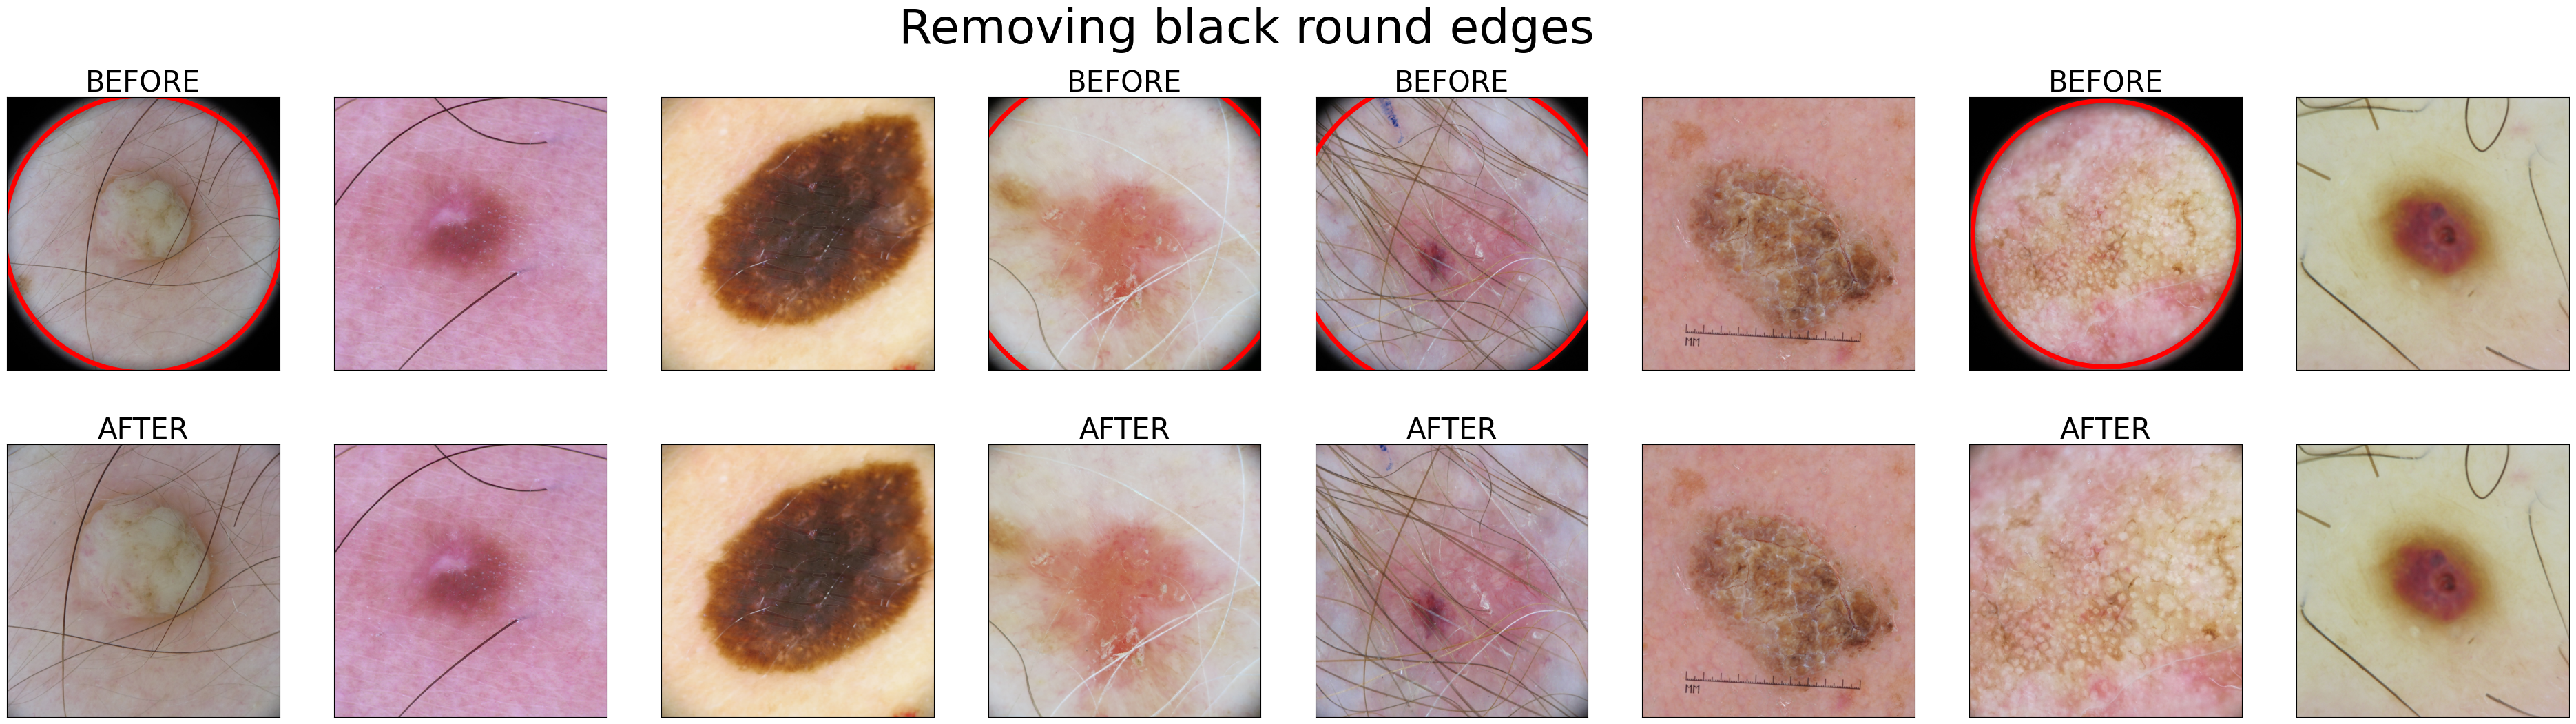

In [81]:
n_samples = 8
image_samples= get_ground_truth_data(n_samples)

num_cols = 8  # Number of columns in the grid
num_rows = (n_samples*2 - 1) // num_cols + 1  # Number of rows in the grid

fig, axes = plt.subplots(num_rows, num_cols, figsize=(6*num_cols, 6*num_rows))
import matplotlib.patches as patches

for i in range(n_samples):
    sample=image_samples.loc[i]
    
    # step 1 - Load the image
    image_file_name=f"{os.path.sep.join(['../raw_data', sample.Cat, sample.image])}.jpg"
    image = Image.open(image_file_name)
    # Square_Crop
    image = square_image(image)
    
    # Detect corner edges
    radius = detect_black_coners(image)
    ax = axes[(i // num_cols)*2, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    if radius>0:
        display_image_with_circle(image, radius, ax)
#         # Add a rectangle patch
#         width, height = image.size
#         rect = patches.Rectangle((0, 0), width, height, linewidth=8, edgecolor='#808080', facecolor='none')
#         ax.add_patch(rect)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_title('BEFORE',fontsize=30)
    else:
        # Display the image
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([]) 
        
    ax = axes[(i // num_cols)*2+1, i % num_cols] if num_rows > 1 else axes[i % num_cols]
    if radius> 0:
        image_cropped=remove_black_corners(image, radius=radius)
        display_image(image_cropped, ax)
#         # Add a rectangle patch
#         width, height = image_cropped.size
#         rect = patches.Rectangle((0, 0), width, height, linewidth=8, edgecolor='#00CC66', facecolor='none')
#         ax.add_patch(rect)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_title('AFTER',fontsize=30)
    else:
        # Display the image
        ax.imshow(image)
        ax.set_xticks([])
        ax.set_xticklabels([])
        ax.set_yticks([])
        ax.set_yticklabels([])


plt.suptitle('Removing black round edges', fontsize=50)
plt.show()